<a href="https://colab.research.google.com/github/chasubeen/ESAA_8th_OB/blob/Week_12/%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EB%94%A5%EB%9F%AC%EB%8B%9D%20%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_4.%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. 간단한 모델 생성**

## **2-1. 데이터 로드 및 전처리**

### **Import**

In [1]:
# tensorflow 모듈 import

import tensorflow as tf

### **Dataset**




In [2]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


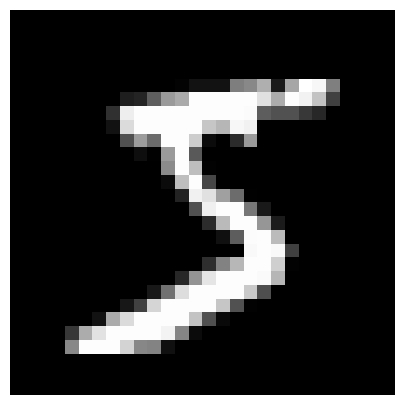

In [3]:
# 샘플 이미지 출력

import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()

plot_image(x_train, 0)

In [4]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


이미지 픽셀이 0 ~ 255 범위의 숫자로 구성된 것을 확인할 수 있다.

In [5]:
# 정규화(Normalization)

x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [6]:
# 채널 추가

print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis] # 채널을 추가하고자 하는 위치에 tf.newaxis를 작성하면 됨
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


## **2-2. Sequential API로 모델 생성 및 학습**

In [7]:
# Sequential API를 사용하여 샘플 모델 생성

model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), # 커널(필터) 개수: 32
                           activation = 'relu',
                           input_shape = (28, 28, 1),  # channel = 1
                           name = 'conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name = 'pool'),

    # Classifier 출력층
    tf.keras.layers.Flatten(), # 1차원 벡터로 펼챠줌
    tf.keras.layers.Dense(10, activation = 'softmax'), # 다중 분류 -> softmax 활용
])

In [8]:
# 모델 컴파일
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data = (x_valid_in, y_valid),
                    epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2177 - accuracy: 0.9388 - val_loss: 0.0953 - val_accuracy: 0.9721
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0841 - accuracy: 0.9758 - val_loss: 0.0658 - val_accuracy: 0.9787
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0629 - accuracy: 0.9811 - val_loss: 0.0642 - val_accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0501 - accuracy: 0.9847 - val_loss: 0.0626 - val_accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0431 - accuracy: 0.9863 - val_loss: 0.0522 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0363 - accuracy: 0.9893 - val_loss: 0.0521 - val_accuracy: 0.9834
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0306 - accuracy: 0.9908 - val_loss: 0.0518 -

In [9]:
# 모델 평가

model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 5ms/step - loss: 0.0572 - accuracy: 0.9847


[0.057186659425497055, 0.9847000241279602]

In [10]:
# 학습 결과 시각화

def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

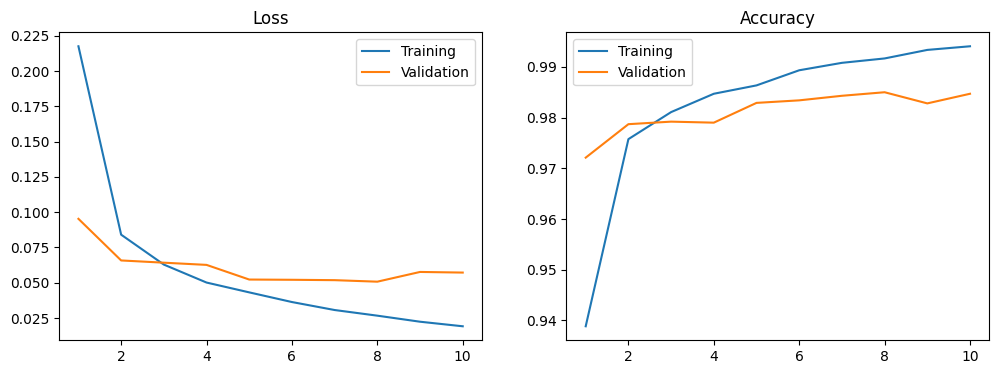

In [11]:
plot_loss_acc(history, 10)

- train set에 대한 손실은 계속 줄어드는 반면 valid set에 대한 손실은 어느 수준에서 더 이상 낮아지지 않고 있는 것을 확인할 수 있다.
  - 4 epoch 이후
  - 모델이 과대적합으로 진행되었다는 것을 파악할 수 있음

## **2-3. 모델 구조 파악**

In [12]:
# 모델 구조

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# 입력 텐서 형태

model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [14]:
# 출력 텐서 형태

model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [15]:
# 레이어

model.layers

In [16]:
# 첫번째 레이어 선택

model.layers[0]

In [17]:
# 첫번째 레이어의 입력

model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [18]:
# 첫번째 레이어의 출력

model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [19]:
# 첫번째 레이어의 가중치

model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-9.99851584e-01, -2.58719891e-01, -1.10860181e+00,
           -5.38398027e-01, -6.07455194e-01,  1.31468084e-02,
            3.74535650e-01,  2.60514528e-01,  7.04993904e-02,
           -4.07890707e-01, -5.41677535e-01, -1.87238351e-01,
           -1.04364181e+00, -3.05286855e-01,  3.75138640e-01,
            2.92625964e-01, -9.81695712e-01, -1.01937456e-02,
            3.46688718e-01,  1.84709683e-01,  4.61650521e-01,
            1.80275008e-01,  3.21329713e-01,  3.05471271e-01,
            3.39162573e-02,  4.13881950e-02,  3.23826939e-01,
            2.70837724e-01,  1.81150287e-01, -5.91388166e-01,
            4.54285145e-02,  3.17204833e-01]],
 
         [[-8.18878949e-01, -5.62588036e-01, -1.00664520e+00,
           -3.40696573e-02,  7.92281411e-04,  4.26423222e-01,
            8.65069702e-02,  3.64290565e-01, -9.44844037e-02,
            1.92395508e-01,  6.67744428e-02,  5.82251966e-01,
           

In [20]:
# 첫번째 레이어 커널 가중치

model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-9.99851584e-01, -2.58719891e-01, -1.10860181e+00,
          -5.38398027e-01, -6.07455194e-01,  1.31468084e-02,
           3.74535650e-01,  2.60514528e-01,  7.04993904e-02,
          -4.07890707e-01, -5.41677535e-01, -1.87238351e-01,
          -1.04364181e+00, -3.05286855e-01,  3.75138640e-01,
           2.92625964e-01, -9.81695712e-01, -1.01937456e-02,
           3.46688718e-01,  1.84709683e-01,  4.61650521e-01,
           1.80275008e-01,  3.21329713e-01,  3.05471271e-01,
           3.39162573e-02,  4.13881950e-02,  3.23826939e-01,
           2.70837724e-01,  1.81150287e-01, -5.91388166e-01,
           4.54285145e-02,  3.17204833e-01]],

        [[-8.18878949e-01, -5.62588036e-01, -1.00664520e+00,
          -3.40696573e-02,  7.92281411e-04,  4.26423222e-01,
           8.65069702e-02,  3.64290565e-01, -9.44844037e-02,
           1.92395508e-01,  6.67744428e-02,  5.82251966e-01,
          -3.35602641e-01,  

In [21]:
# 첫번째 레이어 bias 가중치

model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.00841341, -0.22507395,  0.18208805, -0.1877181 , -0.14829816,
       -0.14911085, -0.5146088 , -0.07522851, -0.20249349, -0.14574912,
       -0.17223845, -0.0063954 , -0.01906423, -0.10945198, -0.39800718,
       -0.37045276, -0.05372415, -0.23435983, -0.41733557, -0.35651168,
       -0.05848021, -0.3115865 , -0.31059384,  0.0732222 , -0.00242819,
       -0.11931531, -0.3297827 , -0.25096306, -0.3508893 , -0.20713332,
       -0.0445416 , -0.32406193], dtype=float32)>

In [22]:
# 레이어 이름 사용하여 레이어 선택

model.get_layer('conv')

In [23]:
## 예측
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs = model.input,
                           outputs = [layer.output for layer in model.layers[:2]] )
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 85ms/step


2

In [24]:
# 첫 번째 레이어(conv) 출력층

conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

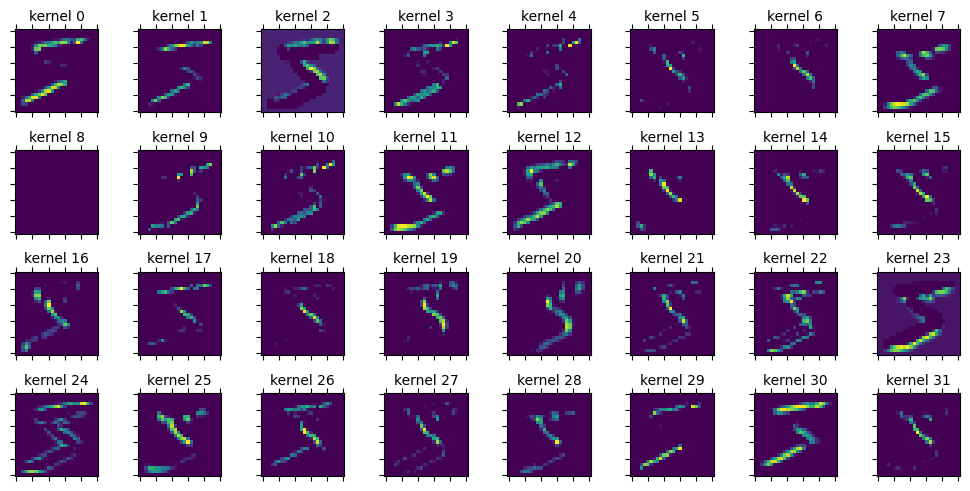

In [25]:
# Convolution Layer 시각화

fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [26]:
# 두 번째 레이어(pool) 출력층

pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


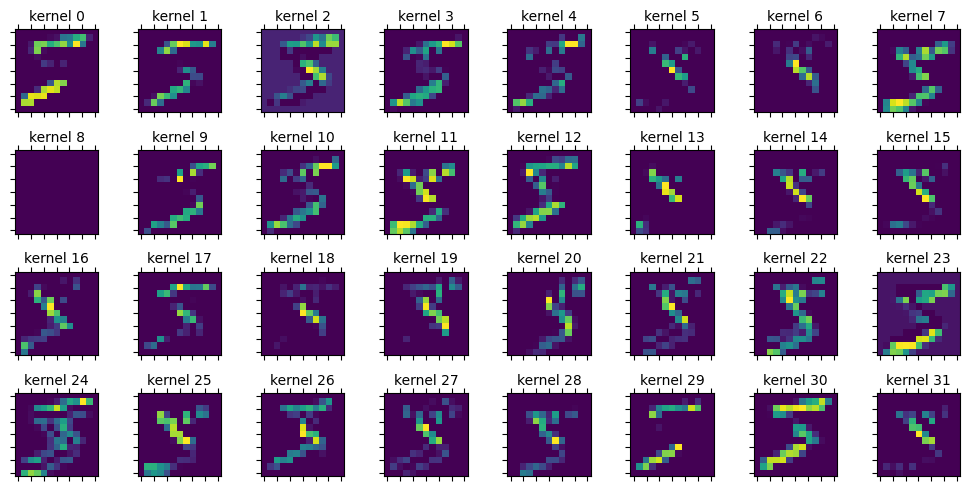

In [27]:
# Pooling Layer 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

# **3. 복잡한 모델 생성**

## **3-1. 데이터셋 준비**

### **import**

In [28]:
import tensorflow as tf
import numpy as np

### **Dataset**

In [29]:
# MNIST 손글씨 이미지 데이터 로드

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [30]:
# 새로운 출력값 배열을 생성(홀수: 1, 짝수: 0)

y_train_odd = []
for y in y_train:
  if y % 2==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [31]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


홀짝 여부가 잘 정리된 것을 확인할 수 있다.

In [32]:
# Validation 데이터셋 처리

y_valid_odd = []
for y in y_valid:
  if y % 2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [33]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


## **3-2. 복잡한 구조로 모델 생성**
- 출력을 2개로 나누기 (분기)
- 2개의 입력을 받는 레이어 구조 만들기

In [34]:
### Functional API를 사용하여 모델 생성

# 입력층
inputs = tf.keras.layers.Input(shape = (28, 28, 1))

# 중간층
conv = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation = 'softmax')(concat)

model = tf.keras.models.Model(inputs = inputs, outputs = outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_1 (Flatten)         (None, 5408)                 0         ['max_pooling2d[0][0]'] 

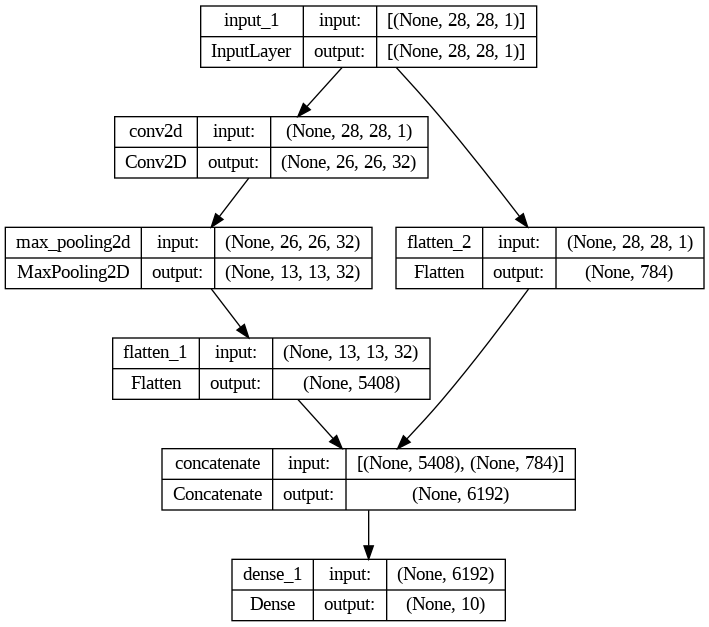

In [37]:
# 모델 구조 출력 및 이미지 파일로 저장

from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [38]:
# 모델 컴파일
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data = (x_valid_in, y_valid),
                    epochs = 10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1997 - accuracy: 0.9431 - val_loss: 0.0854 - val_accuracy: 0.9743
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0774 - accuracy: 0.9769 - val_loss: 0.0613 - val_accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0595 - accuracy: 0.9819 - val_loss: 0.0587 - val_accuracy: 0.9805
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0483 - accuracy: 0.9848 - val_loss: 0.0558 - val_accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0409 - accuracy: 0.9874 - val_loss: 0.0604 - val_accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0334 - accuracy: 0.9898 - val_loss: 0.0567 - val_accuracy: 0.9829
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0284 - accuracy: 0.9914 - val_loss: 0.0577 -

## **3-3. multi-output 모델**
- 출력 1 : 0 ~ 9 까지 숫자 예측
- 출력 2: 각 숫자가 홀수인지 짝수인지 예측

In [39]:
### Functional API를 사용하여 모델 생성

# 입력층
inputs = tf.keras.layers.Input(shape = (28, 28, 1), name = 'inputs')

# 중간층
conv = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', name = 'conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name = 'maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name = 'flatten_layer')(pool)

# 출력층
flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'digit_dense')(concat) # 출력층 1
odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs) # 출력층 2

model = tf.keras.models.Model(inputs = inputs, outputs = [digit_outputs, odd_outputs]) # outputs에 출력층을 모두 넘겨주기

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [40]:
# 모델의 입력과 출력을 나타내는 텐서

print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


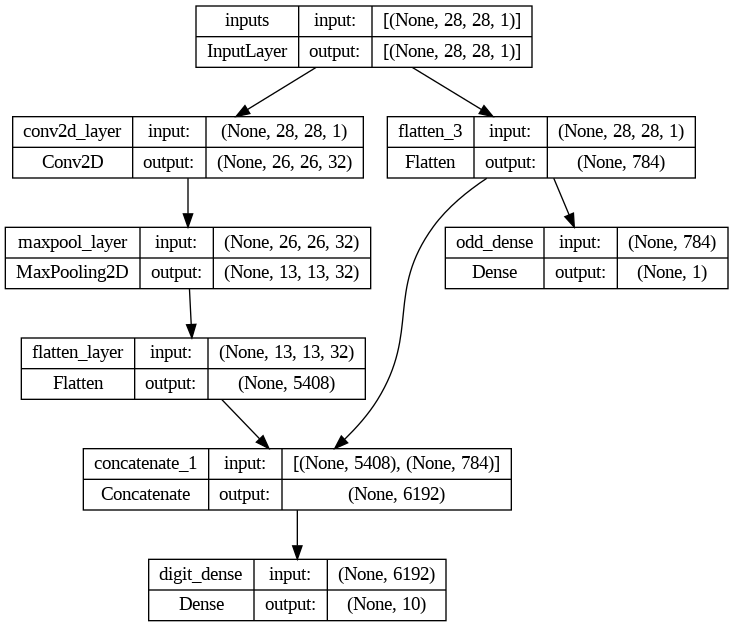

In [41]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [42]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss = {'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'},
              loss_weights = {'digit_dense': 1, 'odd_dense': 0.5}, # loss = 1.0 *sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics = ['accuracy'])

# 모델 훈련
history = model.fit({'inputs': x_train_in}, {'digit_dense': y_train, 'odd_dense': y_train_odd},
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid, 'odd_dense': y_valid_odd}),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 16ms/step - loss: 0.3587 - digit_dense_loss: 0.1957 - odd_dense_loss: 0.3258 - digit_dense_accuracy: 0.9441 - odd_dense_accuracy: 0.8653 - val_loss: 0.2201 - val_digit_dense_loss: 0.0825 - val_odd_dense_loss: 0.2753 - val_digit_dense_accuracy: 0.9750 - val_odd_dense_accuracy: 0.8889
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2131 - digit_dense_loss: 0.0771 - odd_dense_loss: 0.2719 - digit_dense_accuracy: 0.9771 - odd_dense_accuracy: 0.8914 - val_loss: 0.1976 - val_digit_dense_loss: 0.0657 - val_odd_dense_loss: 0.2639 - val_digit_dense_accuracy: 0.9783 - val_odd_dense_accuracy: 0.8964
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1903 - digit_dense_loss: 0.0590 - odd_dense_loss: 0.2627 - digit_dense_accuracy: 0.9822 - odd_dense_accuracy: 0.8952 - val_loss: 0.1913 - val_digit_dense_loss: 0.0611 - val_odd_dense_loss: 0.2604 - val_digit_dense_accuracy: 0.9815 -

In [43]:
# 모델 성능 평가

model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 2s 6ms/step - loss: 0.1976 - digit_dense_loss: 0.0676 - odd_dense_loss: 0.2600 - digit_dense_accuracy: 0.9814 - odd_dense_accuracy: 0.8970


[0.19760054349899292,
 0.0675768256187439,
 0.2600476145744324,
 0.9814000129699707,
 0.8970000147819519]

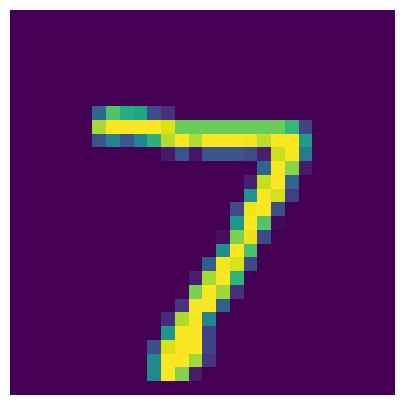

In [44]:
# 샘플 이미지 출력

import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

plot_image(x_valid, 0)

In [45]:
# 검증 데이터셋의 2개 분류 문제에 대한 예측 확률

digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0]) # 10개 분류 레이블에 대한 확률
print(odd_preds[0]) # 홀짝 분류 레이블에 대한 확률

313/313 [==============================] - 2s 6ms/step
[5.8699036e-13 3.6343958e-10 1.5418868e-08 2.9548139e-06 3.3624175e-12
 1.2426071e-11 4.6759553e-19 9.9999696e-01 4.0615361e-10 5.7931391e-08]
[0.99959165]


**예측 확률 -> 실제 정답 레이블**

In [46]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [47]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-47-cb61980817f6>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

정확하게 분류되고 있음을 확인할 수 있다.

## **3-4. 전이 학습(Transfer Learning)**

In [48]:
# 앞의 모델에서 flatten_layer 출력을 추출 -> base model
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs = model.input, outputs = base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


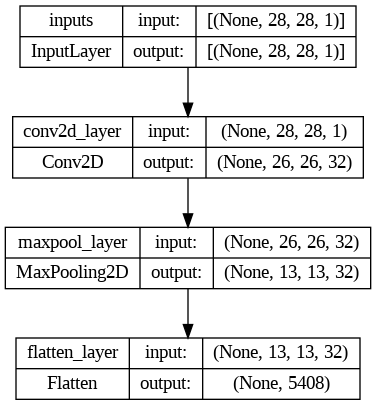

In [49]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [50]:
# Sequential API 적용

digit_model = tf.keras.Sequential([
                                   base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'),
                                   ])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


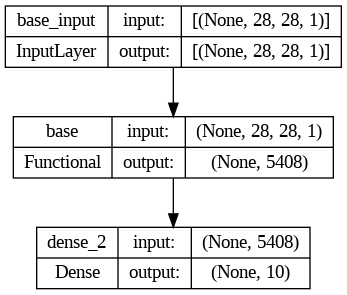

In [51]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [52]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1306 - accuracy: 0.9641 - val_loss: 0.0695 - val_accuracy: 0.9781
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0587 - accuracy: 0.9825 - val_loss: 0.0546 - val_accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0448 - accuracy: 0.9862 - val_loss: 0.0511 - val_accuracy: 0.9839
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0361 - accuracy: 0.9889 - val_loss: 0.0484 - val_accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0291 - accuracy: 0.9909 - val_loss: 0.0578 - val_accuracy: 0.9822
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0247 - accuracy: 0.9927 - val_loss: 0.0560 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0203 - accuracy: 0.9938 - val_loss: 0.0592 -

- 모델 학습 결과를 보면, 에포크 1부터 정확도가 매우 높다.
  - 기존 모델의 가중치를 가지고 모델 학습이 시작되었기 때문..

In [53]:
## 베이스 모델의 가중치를 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


- 훈련 가능한 파라미터의 개수가 0이 된다.

In [54]:
# Functional API 적용

dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [55]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1158 - accuracy: 0.9683 - val_loss: 0.0562 - val_accuracy: 0.9829
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0493 - accuracy: 0.9854 - val_loss: 0.0491 - val_accuracy: 0.9833
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0354 - accuracy: 0.9896 - val_loss: 0.0454 - val_accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0271 - accuracy: 0.9916 - val_loss: 0.0528 - val_accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0509 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.0505 - val_accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0146 - accuracy: 0.9958 - val_loss: 0.0609 - val_ac

In [56]:
## 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)

base_model_frozen2 = tf.keras.models.Model(inputs = model.input, outputs = base_model_output, name = 'base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [57]:
# Functional API 적용

dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [58]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1148 - accuracy: 0.9689 - val_loss: 0.0558 - val_accuracy: 0.9826
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0486 - accuracy: 0.9854 - val_loss: 0.0490 - val_accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0356 - accuracy: 0.9896 - val_loss: 0.0535 - val_accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0281 - accuracy: 0.9915 - val_loss: 0.0503 - val_accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0219 - accuracy: 0.9934 - val_loss: 0.0476 - val_accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0177 - accuracy: 0.9946 - val_loss: 0.0550 - val_accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0144 - accuracy: 0.9959 - val_loss: 0.0513 - val_ac